#**ANÁLISE DESCRITIVA**
* **Dados da Produtividade das Linhas de Separação**
* **Centro de Distribuição de produtos de cabelos e pele**

##**01-Objetivo**



---



##**02-Instalando e Carregando Pacotes**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



---



##**03-Carregando e compreendendo os dados**

In [3]:
# 3.1- código para carregar o dataset de produtividade das linhas de separação do centro de Distrbuição.
dfprod = pd.read_csv("/content/drive/MyDrive/02-PROJETOS/06_ANALISE_PRODUTIVIDADE_CD/PRODUTIVIDADE_CD23.csv",encoding = "ISO-8859-1")


In [4]:
# 3.2-código para mostrar a quantidade de linhas e colunas do dataframe.
dfprod.shape

# Temos 21.840 linhas e 07 colunas.

(21840, 7)

In [5]:
# 3.3- código para contar o número de valores nulos (NaN) em cada coluna do dataFrame.
dfprod.isna().sum()

# Não temos nenhum valor nulo.

data_sep         0
mes              0
hora_sep         0
turno_sep        0
linha_sep        0
categoria        0
produtividade    0
dtype: int64

In [6]:
# 3.4- código para verificar as primeiras 05 linhas do dataframe.
dfprod.head()


,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
0,02/01/2023,jan,06:00-07:00,primeiro_turno,linha_01,shampoos,1249
1,02/01/2023,jan,07:00-08:00,primeiro_turno,linha_01,shampoos,2849
2,02/01/2023,jan,08:00-09:00,primeiro_turno,linha_01,shampoos,823
3,02/01/2023,jan,09:00-10:00,primeiro_turno,linha_01,shampoos,2478
4,02/01/2023,jan,10:00-11:00,primeiro_turno,linha_01,shampoos,1030


In [7]:
# 3.5- código para verificar as 05 últimas linhas do dataframe.
dfprod.tail()

,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
21835,31/10/2023,out,16:00-17:00,segundo_turno,linha_06,protetor_solar,1625
21836,31/10/2023,out,17:00-18:00,segundo_turno,linha_06,protetor_solar,1033
21837,31/10/2023,out,19:00-20:00,segundo_turno,linha_06,protetor_solar,1826
21838,31/10/2023,out,20:00-21:00,segundo_turno,linha_06,protetor_solar,796
21839,31/10/2023,out,21:00-22:00,segundo_turno,linha_06,protetor_solar,957


In [8]:
# 3.6- código para fornecer informações concisas sobre um dataFrame.
dfprod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21840 entries, 0 to 21839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   data_sep       21840 non-null  object
 1   mes            21840 non-null  object
 2   hora_sep       21840 non-null  object
 3   turno_sep      21840 non-null  object
 4   linha_sep      21840 non-null  object
 5   categoria      21840 non-null  object
 6   produtividade  21840 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [9]:
dfprod.select_dtypes(include='int64')

# 06- Código para selecionar todas as colunas do DataFrame que possuem o tipo de dados int64 (inteiros).
# Temos no dataframe 21.840 linhas e 1 coluna com tipo de dados int64 (inteiros.

,produtividade
0,1249
1,2849
2,823
3,2478
4,1030
...,...
21835,1625
21836,1033
21837,1826
21838,796


In [10]:
dfprod.select_dtypes(include='object')
# 07- Código para selecionar todas as colunas do DataFrame que possuem o tipo de dados object (texto).
# Temos no dataframe 21,840 linhas e 06 colunas com tipo de dados object (texto).

,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria
0,02/01/2023,jan,06:00-07:00,primeiro_turno,linha_01,shampoos
1,02/01/2023,jan,07:00-08:00,primeiro_turno,linha_01,shampoos
2,02/01/2023,jan,08:00-09:00,primeiro_turno,linha_01,shampoos
3,02/01/2023,jan,09:00-10:00,primeiro_turno,linha_01,shampoos
4,02/01/2023,jan,10:00-11:00,primeiro_turno,linha_01,shampoos
...,...,...,...,...,...,...
21835,31/10/2023,out,16:00-17:00,segundo_turno,linha_06,protetor_solar
21836,31/10/2023,out,17:00-18:00,segundo_turno,linha_06,protetor_solar
21837,31/10/2023,out,19:00-20:00,segundo_turno,linha_06,protetor_solar
21838,31/10/2023,out,20:00-21:00,segundo_turno,linha_06,protetor_solar


In [11]:
dfprod.describe()
# 08- código para gerar as estatísticas descritivas para as colunas numéricas int64 (inteiros) do dataFrame.
# Temos count =  quantidade de linhas,
# mean =  Média da separação de peças/h.
# min = Indica o valor minimo que foi alcabçado na separação de peças/h.
# std =  Desvio padrão separação de peças/h
# Primeiro quartil =  25 %  da separação de peças/h estão abaixo desse valor.
# Segundo Quartil = Mediana = 50%  da separação de peças/h estão abaixo desse valor.
# Terceiro Quartil = 75% da separação de peças/h estã abaixo dessa valor.
# Valor máximo = Indica o valor máximo que foi alcabçado na separação de peças/h.

,produtividade
count,21840.000000
mean,1595.212225
std,608.726098
min,600.000000
25%,1110.750000
50%,1401.000000
75%,2051.000000
max,3000.000000


In [12]:
dfprod.duplicated().sum()
# 10- Código retornar o número total de linhas duplicadas no dataFrame.
# Não temos no dataframe nenhuma linha duplicada

0

##**04-Respondendo as perguntas de negócios**

###**01-Qual é a distribuição da separação de peças/h do centro de distrbuição?**

####**Cálculo do Histograma**

In [22]:
#@title
# A- Cálculo do Histograma
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(dataframe):
    plt.rc('font', size=10)
    plt.rc('axes', titlesize=10)
    plt.rc('axes', labelsize=10)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('figure', titlesize=10)


    plt.figure(figsize=(10, 6))


    dfprod["produtividade"].hist(bins=30, edgecolor='black', color='steelblue')


    plt.title('Histograma - Separação de peças por hora - Centro de Distribuição New Cosmetic ')
    plt.xlabel('Produtividade')
    plt.ylabel('Frequência')


    sns.set(style="white")


    plt.show()

    return

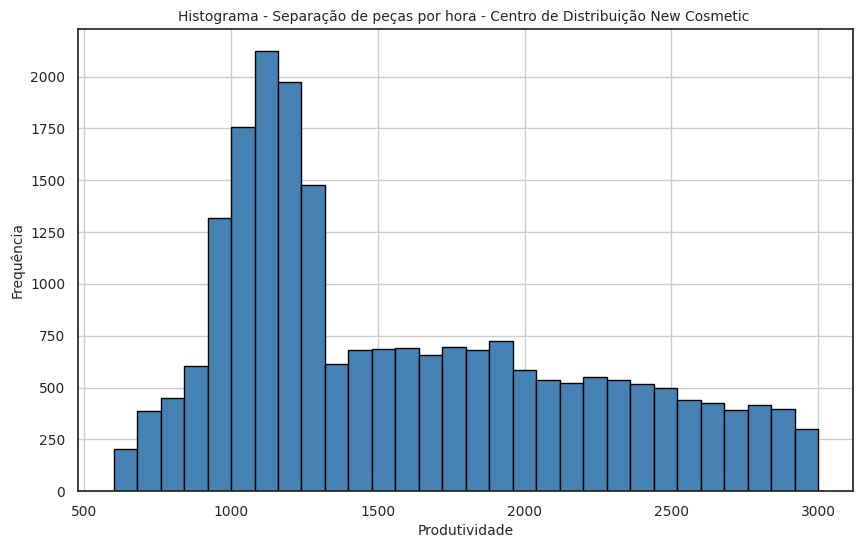

In [21]:
#@title
plot_histogram(dfprod)

In [23]:

#@title
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(dataframe):
    # Configurar tamanhos padrão da fonte
    plt.rc('font', size=10)          # Tamanho geral da fonte
    plt.rc('axes', titlesize=10)     # Tamanho da fonte do título dos eixos
    plt.rc('axes', labelsize=10)     # Tamanho da fonte das etiquetas dos eixos
    plt.rc('xtick', labelsize=9)     # Tamanho da fonte dos rótulos do eixo x
    plt.rc('ytick', labelsize=9)     # Tamanho da fonte dos rótulos do eixo y
    plt.rc('legend', fontsize=10)    # Tamanho da fonte da legenda
    plt.rc('figure', titlesize=10)   # Tamanho da fonte do título da figura

    # Calcular estatísticas descritivas
    estatisticas = dfprod["produtividade"].describe()

    # Configurar o tamanho da figura
    plt.figure(figsize=(10, 6))

    # Criar boxplot com cor nas caixas internas e aumentar a caixa
    bp = plt.boxplot(dfprod["produtividade"], patch_artist=True, widths=0.7)
    bp['boxes'][0].set_facecolor('steelblue') # Definir cor das caixas internas

    # Adicionar linhas para a média, mediana (50%), Q1, Q3, mínimo e máximo
    plt.axhline(estatisticas['mean'], color='green', linewidth=2, label='Média')
    plt.text(1.1, estatisticas['mean'] + 10, f'{estatisticas["mean"]:.0f}',\
             color='black', verticalalignment='bottom') # Valor da Média

    plt.axhline(estatisticas['50%'],\
                color='limegreen', linewidth=2, label='Mediana')  # Mediana
    plt.text(1.1, estatisticas['50%'] + 10, f'{estatisticas["50%"]:.0f}',\
             color='black', verticalalignment='bottom')  # Valor da Mediana

    plt.axhline(estatisticas['25%'], color='tomato', linewidth=2, label='Q1')
    plt.text(1.1, estatisticas['25%'] + 10, f'{estatisticas["25%"]:.0f}',\
             color='black', verticalalignment='bottom')  # Valor de Q1

    plt.axhline(estatisticas['75%'], color='orange', linewidth=2, label='Q3')
    plt.text(1.1, estatisticas['75%'] + 10, f'{estatisticas["75%"]:.0f}',\
             color='black', verticalalignment='bottom')  # Valor de Q3

    plt.axhline(estatisticas['min'], color='red', linewidth=2, label='Mínimo')
    plt.text(1.1, estatisticas['min'] + 10, f'{estatisticas["min"]:.0f}',\
             color='black', verticalalignment='bottom')  # Valor do Mínimo

    plt.axhline(estatisticas['max'], color='blue', linewidth=2, label='Máximo')
    plt.text(1.1, estatisticas['max'] + 10, f'{estatisticas["max"]:.0f}',\
             color='black', verticalalignment='bottom')  # Valor do Máximo

    # Adicionar outliers se houver
    outliers = bp['fliers'][0].get_ydata()
    plt.scatter([1] * len(outliers), outliers,\
                marker='o', color='red', alpha=0.7, label='Outliers')

    # Configurar o estilo Seaborn
    sns.set(style="white")

    plt.title('Boxplot Média de Separação de Peças por hora')
    plt.ylabel('Produtividade')
    plt.legend()  # Adicionar legenda
    plt.show()

    return



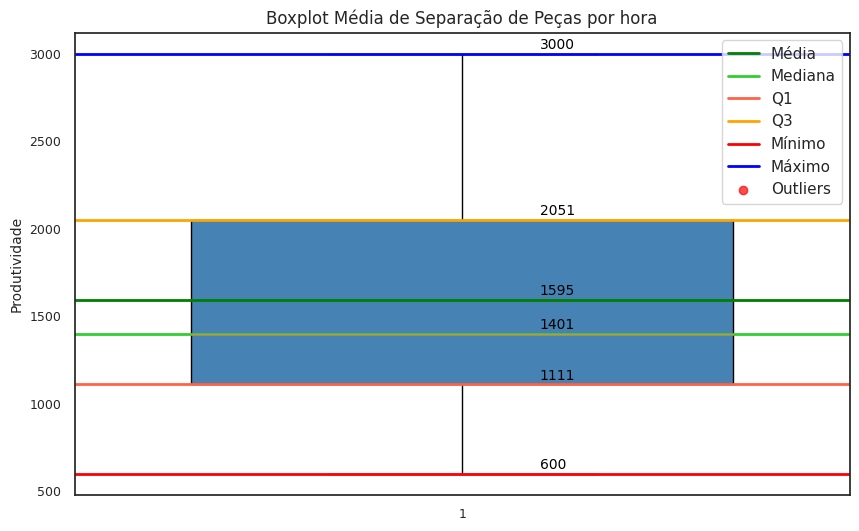

In [16]:
# Chamar a função passando o DataFrame como argumento
plot_boxplot(dfprod)